# vehicle

In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2


In [3]:
from matplotlib import pyplot as plt


In [4]:
import numpy as np

In [5]:

import imutils

# easy ocr

In [6]:
pip install easyocr


Note: you may need to restart the kernel to use updated packages.


# 123

In [7]:


pip install -U numpy --user

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     --------------------------------- ------ 51.2/61.0 kB ? eta -:--:--
     ---------------------------------------- 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 2.6 MB/s eta 0:00:06
   ---------------------------------------- 0.1/15.8 MB 1.4 MB/s eta 0:00:11
   ---------------------------------------- 0.2/15.8 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.2/15.8 MB 1.3 MB/s eta 0:00:13
    --------------------------------------- 0.3/15.8 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.3/15.8 MB 1.3 MB/s eta 0:00:12
   - ---------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-65e29aac85b9409a6008e2dc84b1cc09.dll'
Check the permissions.



In [8]:

pip install -U easyocr --user

In [9]:
import easyocr

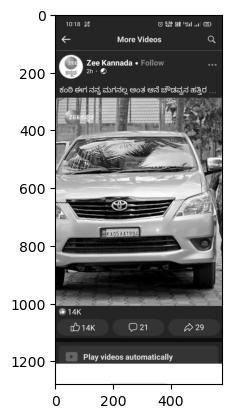

In [11]:
img = cv2.imread('image5.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

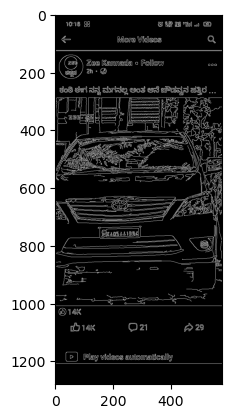

In [12]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [13]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [14]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [15]:
location

array([[[288, 742]],

       [[177, 744]],

       [[177, 771]],

       [[288, 768]]], dtype=int32)

In [16]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

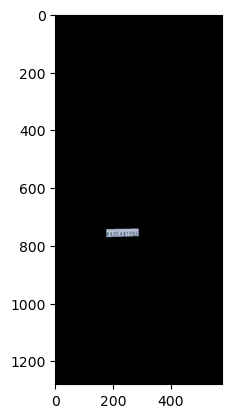

In [17]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [18]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

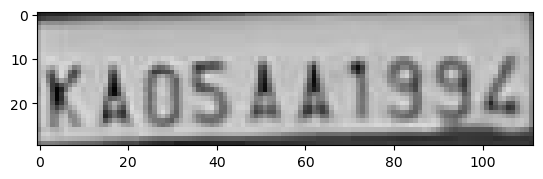

In [19]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [20]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 3], [112, 3], [112, 30], [0, 30]], 'K405441994', 0.3543821274591966)]

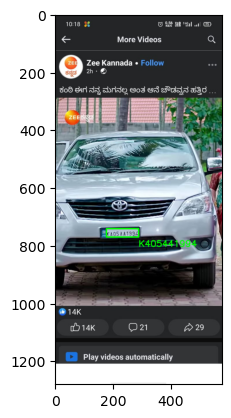

In [21]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [22]:
print("Vehicle No: ", text)

Vehicle No:  K405441994


In [23]:
v1 = text.replace(".", "")
print(v1)

K405441994


In [24]:
v2 = v1.replace(" ", "")
print(v2)

K405441994


In [25]:
def replace_by_index(s, index, replacement):
    # Convert string to list
    lst = list(s)
    
    # Replace the character at the specified index
    lst[index] = replacement
    
    # Join the list back to a string
    return ''.join(lst)


In [26]:
if len(v2)==10:
    
    if v2[4]=="4":
        v2 = replace_by_index(v2, 4, 'A')

    if v2[5]=="4":
    
        v2 = replace_by_index(v2, 5, 'A')
    if v2[5]=="5":
        v2 = replace_by_index(v2, 5, 'S')
    if v2[4]=="5":
        v2 = replace_by_index(v2, 4, 'S')
    if v2[0]=="4":
        v2 = replace_by_index(v2, 0, 'A')
    if v2[1]=="4":
        v2 = replace_by_index(v2, 1, 'A')


if len(v2)==9:
    
    if v2[3]=="4":
        v2 = replace_by_index(v2, 4, 'A')
    if v2[3]=="5":
        v2 = replace_by_index(v2, 5, 'S')
    if v2[0]=="4":
        v2 = replace_by_index(v2, 0, 'A')
    if v2[1]=="4":
        v2 = replace_by_index(v2, 1, 'A')
        
print(v2)



KA05AA1994


# Image Stitching:

In [41]:
import cv2 
image_paths=['stich1.jpeg','stich2.jpeg','stich3.jpeg']

In [42]:
# initialized a list of images 
imgs = []

In [43]:
for i in range(len(image_paths)): 
    imgs.append(cv2.imread(image_paths[i])) 
    imgs[i]=cv2.resize(imgs[i],(0,0),fx=0.4,fy=0.4) 
    # this is optional if your input images isn't too large 
    # you don't need to scale down the image 
    # in my case the input images are of dimensions 3000x1200 
    # and due to this the resultant image won't fit the screen 
    # scaling down the images  

  

In [44]:
import matplotlib.pyplot as plt
import cv2

# Convert images from BGR to RGB (Matplotlib expects RGB)
for i in range(len(imgs)):
    imgs[i] = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB)


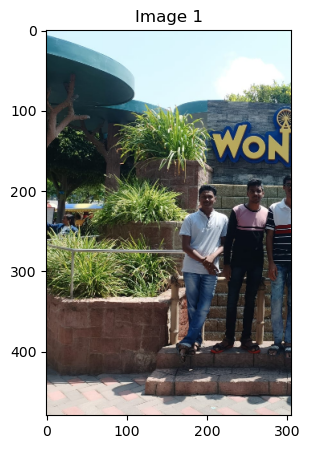

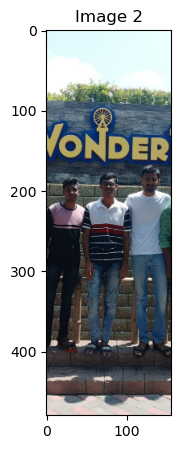

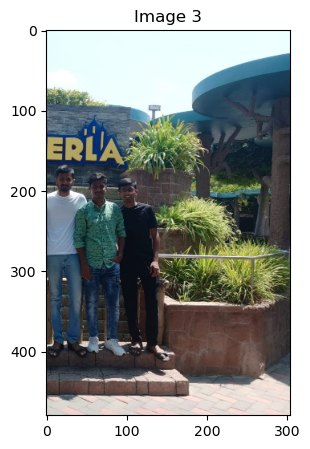

In [45]:
# Plotting the images
for i, img in enumerate(imgs):
    plt.figure(figsize=(10, 5))
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.show()

In [46]:

# Initialize the Stitcher and perform stitching
stitchy = cv2.Stitcher.create()
(dummy, output) = stitchy.stitch(imgs)

In [47]:

if dummy != cv2.STITCHER_OK:
    print("Stitching wasn't successful.")
else:
    print('Your Panorama is ready!!!')

    # Convert the stitched image from BGR to RGB (Matplotlib expects RGB)
    output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

    # Display the stitched panorama using Matplotlib
    plt.figure(figsize=(20, 10))  # You might want to adjust the figure size based on your panorama's aspect ratio
    plt.imshow(output_rgb)
    plt.title('Final Result')
    plt.axis('off')  # Optionally hide the axis
    plt.show()

Stitching wasn't successful.


In [48]:
!pip install opencv-python opencv-python-headless matplotlib


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.1/38.6 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.1/38.6 MB 853.3 kB/s eta 0:00:46
   ---------------------------------------- 0.2/38.6 MB 807.1 kB/s eta 0:00:48
   ---------------------------------------- 0.2/38.6 MB 888.4 kB/s eta 0:00:44
   ---------------------------------------- 0.2/38.6 MB 885.4 kB/s eta 0:00:44
   ---------------------------------------- 0.3/38.6 MB 811.7 kB/s eta 0:00:48
   ---------------------------------------- 0.3/38.6 MB 759.5 kB/s eta 0:00:51
  

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [49]:
import cv2
import matplotlib.pyplot as plt

In [50]:
# Load the images
image_paths = ['stich1.jpeg','stich2.jpeg','stich3.jpeg']
imgs = [cv2.imread(image) for image in image_paths]


In [51]:
# Check if all images were loaded
if not all(img is not None for img in imgs):
    raise ValueError("One or more images failed to load.")


In [52]:
# Initialize the Stitcher, perform stitching and handle the result
stitcher = cv2.Stitcher.create()
status, stitched = stitcher.stitch(imgs)

In [53]:

if status != cv2.Stitcher_OK:
    raise Exception("Stitching failed with error code: {}".format(status))


In [54]:
# Convert the stitched image from BGR to RGB
stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)


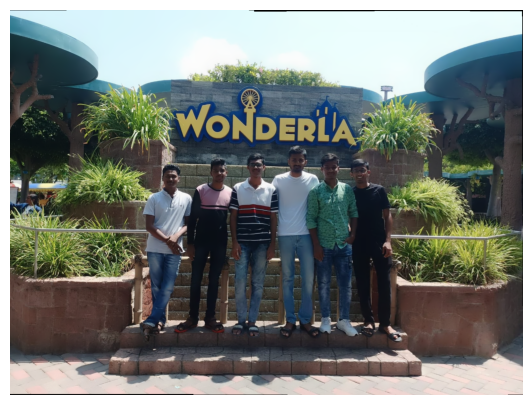

In [55]:
# Display the stitched image
plt.figure(figsize=(15, 5))  # Adjust the size as needed
plt.imshow(stitched_rgb)
plt.axis('off')  # Hide the axes
plt.show()